<div style="font-weight: bold;font-size:40px">Introduction</div>

><div style="background-color: #FBFFEE;">
><ul style="font-size:20px;">
 Hello everyone!
>    
>    I believe that the best approach to learn is to learn what you're passionate about.
>So, I'm passionate about healthy food 🥑 Let's learn together and investigate avocado prices!
>We will discover this question with the use of EDA (the second step) and ML methods (the third step).
>    
>Many thanks to the сreator of this dataset,
><br>If you like this project, please, support me - UPvote!😃

<center><img src="https://i.pinimg.com/564x/cf/c4/f1/cfc4f1cfd6d9af866b8cd3ace353b6d5.jpg" width=300></center>


</ul>
</div>


<div style="font-weight: bold;font-size:30px">Data columns description & libraries</div>

><div style="background-color: #FBFFEE;">
><ul style="font-size:18px;">
<li> Date - The date of the observation</li>
<li> AveragePrice - the average price of a single avocado</li>
<li> type - conventional or organic</li>
<li> year - the year</li>
<li> Region - the city or region of the observation</li>
<li> Total Volume - Total number of avocados sold</li>
<li> 4046 - Total number of avocados with PLU 4046 sold</li>
<li> 4225 - Total number of avocados with PLU 4225 sold</li>
<li> 4770 - Total number of avocados with PLU 4770 sold</li>
</ul>
</div>

<br><div style="font-weight: bold;font-size:30px">Table of Contents</div>

* [Step 1: Examining Data](#section-two)
    - [Basic information](#sub-21)
    - [Data preproccessing](#sub-22)
    - [Making additional columns](#sub-23)

* [Step 2: EDA](#section-three)
    - [2.1 Research of daily, monthly and per year average price](#sub-31)
    - [2.2 Examining features](#sub-32)
    - [2.3 The correlation matrix](#sub-33)
    
* [Step 3: Regression](#section-four)
    - [2.1 Research of daily, monthly and per year average price](#sub-31)
    - [2.2 Examining features](#sub-32)
    - [2.3 The correlation matrix](#sub-33)
* [Overall Conclusion](#section-end)
    

In [8]:
#Importing Requierd Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# for Interactive Shells
from IPython.display import display
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


#removing warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report 

# to depict tree_prediction
#! pip install pydotplus
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image
import missingno as msno


#secrets
#from kaggle_secrets import UserSecretsClient
#secret_label = "notebook_secret"
#secret_value = UserSecretsClient().get_secret(secret_label)

<a id="section-two"></a>
<div style="font-weight: bold;font-size:30px">Step 1: Examining Data</div>

<a id="sub-21"></a>
<div style="font-weight: bold;font-size:20px">1.1 Basic information</div>

Examining "Avocado dataset"


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


None

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,2017-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,Midsouth
freq,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

There are 0 duplicates.
There are no missing values in "Avocado dataset".


169 unique items: ['2015-12-27' '2015-12-20' '2015-12-13' '2015-12-06' '2015-11-29'
 '2015-11-22' '2015-11-15' '2015-11-08' '2015-11-01' '2015-10-25'
 '2015-10-18' '2015-10-11' '2015-10-04' '2015-09-27' '2015-09-20'
 '2015-09-13' '2015-09-06' '2015-08-30' '2015-08-23' '2015-08-16'
 '2015-08-09' '2015-08-02' '2015-07-26' '2015-07-19' '2015-07-12'
 '2015-07-05' '2015-06-28' '2015-06-21' '2015-06-14' '2015-06-07'
 '2015-05-31' '2015-05-24' '2015-05-17' '2015-05-10' '2015-05-03'
 '2015-04-26' '2015-04-19' '2015-04-12' '2015-04-05' '2015-03-29'
 '2015-03-22' '2015-03-15' '2015-03-08' '2015-03-01' '2015-02-22'
 '2015-02-15' '2015-02-08' '2015-02-01' '2015-01-25' '2015-01-18'
 '2015-01-11' '2015-01-04' '2016-12-25' '2016-12-18' '2016-12-11'
 '2016-12-04' '2016-11-27' '2016-11-20' '2016-11-13' '2016-11-06'
 '2016-10-30' '2016-10-23' '2016-10-16' '2016-10-09' '2016-10-02'
 '2016-09-25' '2016-09-18' '2016-09-11' '2016-09-04' '2016-08-28'
 '2016-08-21' '2016-08-14' '2016-08-07' '2016-07-31' '2016

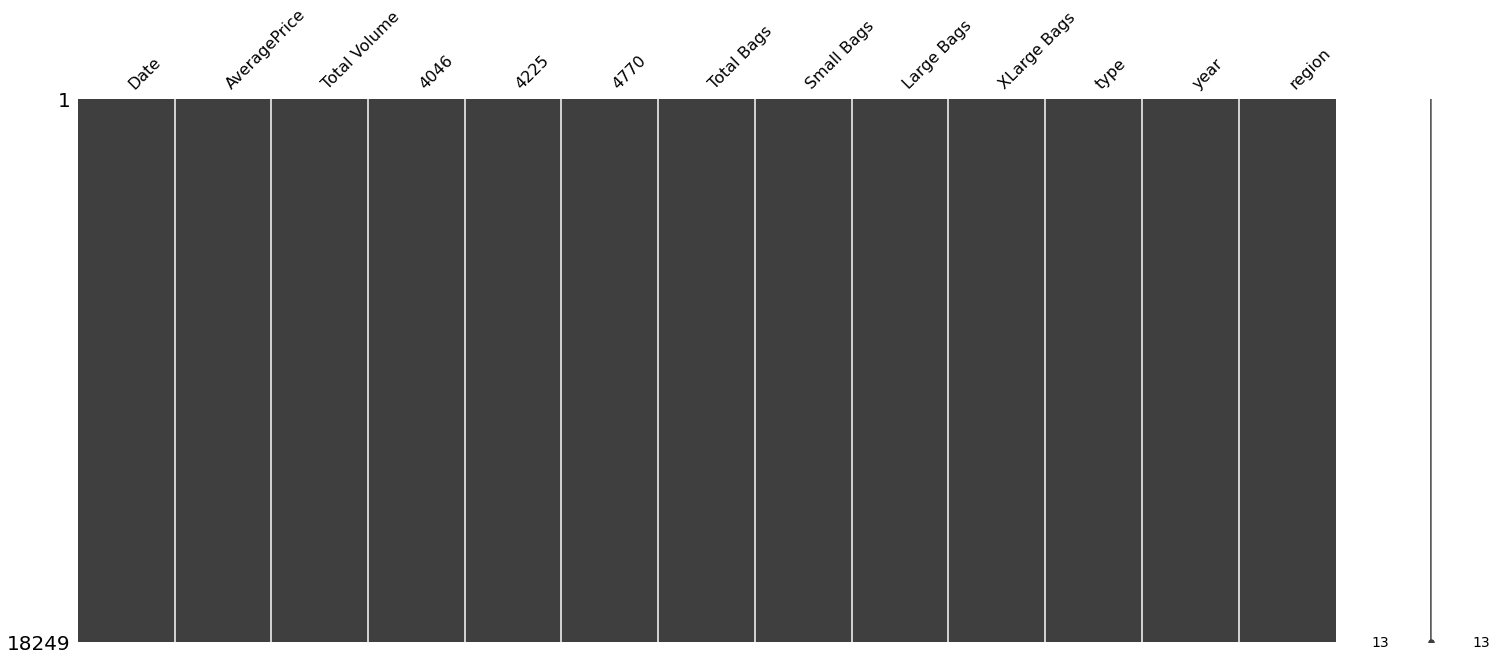

In [38]:
#loading data
df = pd.read_csv('avocado.csv')
df = df.drop(columns=['Unnamed: 0'])
    
#making a function for examining data
def data_research(data, data_name='data'):
    #basic
    print(f'Examining "{data_name}"')
    display(data.head())
    display(data.info())
    display(data.describe(include='all'))
    display(data.columns)
    
    #duplicates
    duplicates = data.duplicated().sum()
    if duplicates > 0:
        print('There are no duplicated entries.')
    else:
        print(f'There are {duplicates} duplicates.')
        
    #missing
    data_missing = pd.DataFrame(round(data.isnull().sum() / data.shape[0] * 100, 2))
    if data_missing[0].sum() > 0:
        print(f'Missing values in the "{data_name}":')
        data_missing.plot(kind='bar')
    else:
        print(f'There are no missing values in "{data_name}".')
        
    display(msno.matrix(data))
    
    #unique values
    for i in data.columns:
        if data[i].dtype == 'object' or data[i].dtype == 'str':
            print(data[i].nunique(),"unique items:", data[i].unique())
    
data_research(df, data_name='Avocado dataset')

><div style="background-color: #FBFFEE;">
><div style="font-weight: bold;font-size:20px">Observations</div>
><ul style="font-size:18px;">
><center><img src="https://i.pinimg.com/originals/c2/1e/cb/c21ecb47122ea4d8eeab4d9ae968cc36.jpg", width=650></center>
We've examined data:
<br>- There are 18249 entries and 14 columns, one column is an index, so it is needed to drop it;
<br>- No missing or duplicated values and errors (at the first glance), all unique values are correct and don't repeat;
<br>- There are some columns, which datatypes are should be changed.<br>
At the next step we'll study and preprocess outliers, rename column names and change datatypes.
></ul>
></div>

<a id="sub-22"></a>
<div style="font-weight: bold;font-size:20px">1.2 Data preproccessing</div>

<div style="font-weight: bold;font-size:16px">1.2.1 Renaming columns and drop the unecessary one</div>

In [39]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ","_")
df.columns

Index(['date', 'averageprice', 'total_volume', '4046', '4225', '4770',
       'total_bags', 'small_bags', 'large_bags', 'xlarge_bags', 'type', 'year',
       'region'],
      dtype='object')

<div style="font-weight: bold;font-size:16px">1.2.2 Changing data types</div>

In [49]:
print(df.date.astype('datetime64[ns]')[0])
print(pd.to_datetime(df.date)[0])
print(df.region[0]))

2015-12-27 00:00:00
2015-12-27 00:00:00
<class 'str'>


In [58]:
for i in df.columns:
    if i == 'date':
        df[i] = df[i].astype('datetime64[ns]')
    elif df[i].dtype == 'object':
        df[i] = df[i].astype('category')

numeric_columns = ['averageprice', 'total_volume',
                   '4046', '4225', '4770',
                   'total_bags', 'small_bags',
                   'large_bags', 'xlarge_bags']
categorical_columns = ['region', 'type']
data_columns = ['data', 'year']
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          18249 non-null  datetime64[ns]
 1   averageprice  18249 non-null  float64       
 2   total_volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   total_bags    18249 non-null  float64       
 7   small_bags    18249 non-null  float64       
 8   large_bags    18249 non-null  float64       
 9   xlarge_bags   18249 non-null  float64       
 10  type          18249 non-null  category      
 11  year          18249 non-null  int64         
 12  region        18249 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(9), int64(1)
memory usage: 1.6 MB


None

<div style="font-weight: bold;font-size:16px">1.2.3 Getting known with the kind of distrubutions</div>

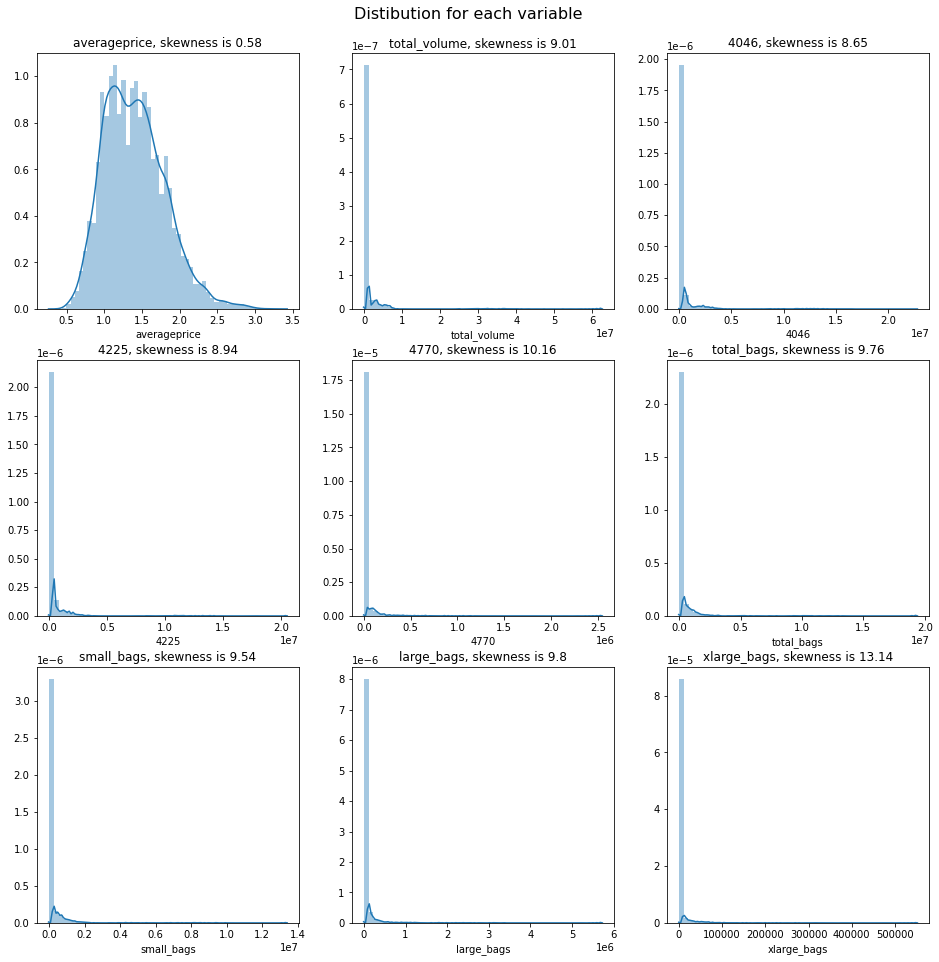

In [71]:
# distributions
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(16,16))
    fig.suptitle(suptitle,y=0.92, size=16)
    #print(axs)
    axs = axs.flatten()
    #print(axs)
    for i, data in enumerate(columns_list):
        sns.distplot(dataset[data], ax=axs[i])
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
dist_custom(dataset=df, columns_list=numeric_columns, rows=3, cols=3, suptitle='Distibution for each variable')

<div style="font-size:16px">
<b>Conclusion:</b> all features are skewed to the left, there is no Normal Distribution.

Let's examine outliers with the use of boxplots.</div>


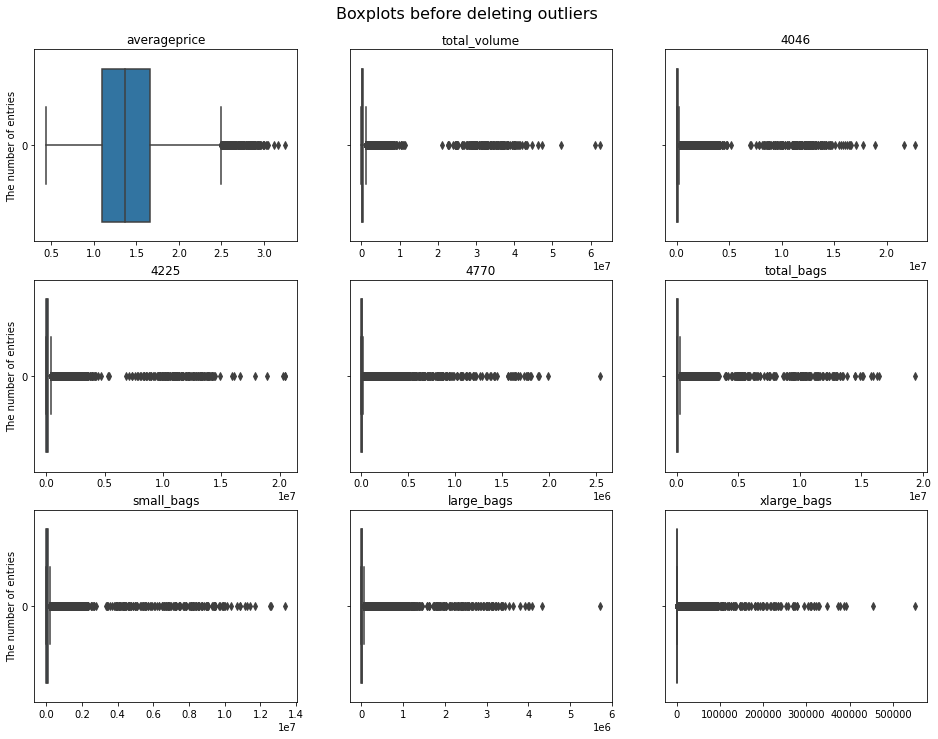

In [73]:
# outliers
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,12))
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % 3 == 0:
            axs[i].set_ylabel('The number of entries')
        sns.boxplot( data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=3, cols=3, suptitle='Boxplots before deleting outliers')

 <div style="font-size:16px">For Skewed distributions we'll use Inter-Quartile Range (IQR) proximity rule.</div>

In [74]:
# deleting outliers
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
print('Here we will get IQR for each column\n',IQR)

df_filtered = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) |(df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
display(df_filtered.shape)

Here we will get IQR for each column
 averageprice         0.56
total_volume    422123.71
4046            110166.13
4225            147198.08
4770              6243.42
total_bags      105694.73
small_bags       80488.25
large_bags       21901.78
xlarge_bags        132.50
dtype: float64


(11538, 13)

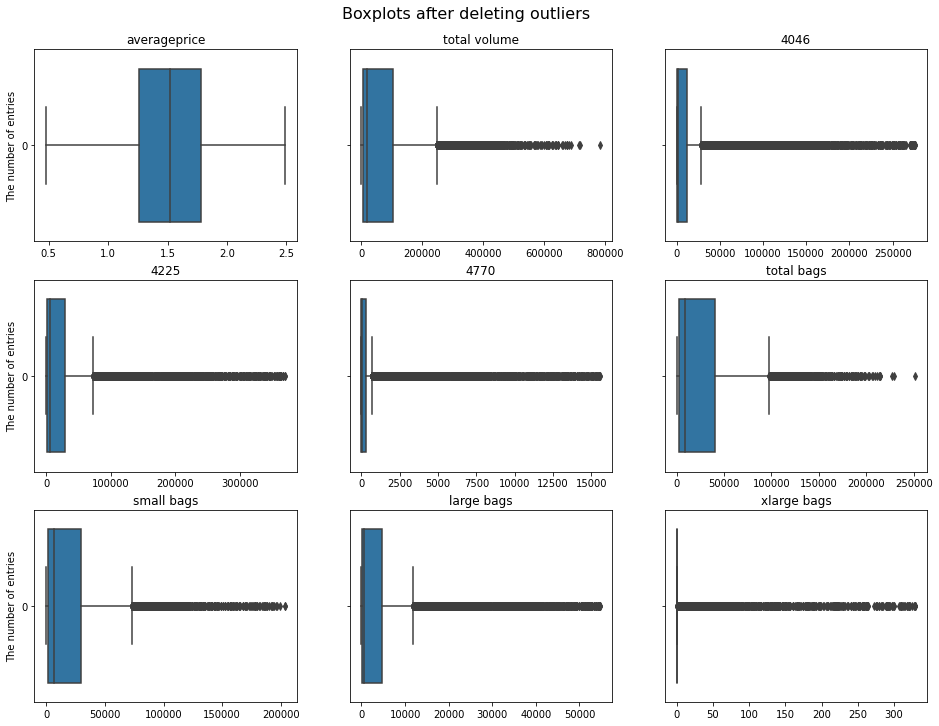

In [8]:
boxplots_custom(dataset=df_filtered, 
                columns_list=numeric_columns, 
                rows=3, cols=3, suptitle='Boxplots after deleting outliers')

><div style="background-color: #FBFFEE;">
><div style="font-weight: bold;font-size:20px">Observations</div>
><ul style="font-size:18px;">
>
>Looks much better now! But nevertheless we see some outliers even in filtered data. It will be great to scale the features at the step of building model.
We'll use filtered data further
> 
></ul>
></div>

<a id="sub-23"></a>
<div style="font-weight: bold;font-size:20px">1.3 Making additional columns to filtered data</div>

We already have information about day and year of price scanning, nor let's add additional columns for the further cohort research:
- week;
- month.

In [75]:
df_filtered['month'] = df_filtered['date'].astype('datetime64[M]')
df_filtered['week'] = df_filtered['date'].astype('datetime64[W]')
bins = [0.48, 1.52, 1.78, 1.9, 2.49]
labels = ["low","mean","high",'expensive']
df_filtered['price_types'] = pd.cut(df['averageprice'], bins=bins, labels=labels)
df_filtered.head()

,date,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,month,week,price_types
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015-12-01,2015-12-24,low
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015-12-01,2015-12-17,low
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015-12-01,2015-12-10,low
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015-12-01,2015-12-03,low
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015-11-01,2015-11-26,low


><div style="background-color: #FBFFEE;">
><div style="font-weight: bold;font-size:20px">Conclusion:</div>
><ul style="font-size:18px;">
> At this stage:
><li> examined the data;</li>
><li> renamed column name and drop the unecessary column 'Unnamed: 0';</li>
><li> changed dtypes;</li>
><li> observed the kind of disributions and calculated the skewness value for each numeric column;</li>
><li> plotted boxcharts before and after removing outliers;</li>
><li> added new columns for the further research.</li>
>Now we're going to make Exploratory Data Analysis➡
></ul>
></div>

<a id="section-three"></a>
<div style="font-weight: bold;font-size:30px">Step 2: EDA</div>

<a id="sub-31"></a>
><div style="font-weight: bold;font-size:20px">2.1 Research of daily, monthly and per year average price</div>
><div style="font-size:16px">
Let's create new dataset with avarage avocado price per day, month and year. After that we'll create lineplots with the use of plotly.express and analyze it</div>

In [112]:
# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=2, subplot_titles=("Daily average prices", "Weekly average prices",
                                    "Monthly average prices", "Average prices per years")
                                        )

datasets = []
for i in ['date','week','month','year']:
    datasets.append(round(df_filtered.groupby(i)['averageprice'].mean().reset_index(),3))
r, c = 1,1 #rows, cols
    
for i, d in enumerate(datasets):
    # Add traces
    print(r,c)
    fig.add_trace(go.Scatter(x=d.iloc[:,0], y=d['averageprice']), row=r, col=c)
    fig.update_xaxes(title_text='Per ' + d.iloc[:,0].name,row=r, col=c)
    fig.update_yaxes(title_text="The sum of avarage price", row=r, col=c)
    if i == 1:
        r, c = 2, 1
    else:
        c += 1
    
# Update title and height
fig.update_layout(showlegend=False, title_text="Customizing Subplot Axes", height=700)

fig.show()

1 1
1 2
2 1
2 2


In [77]:
# Initialize figure with subplots
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("Daily average prices", 
                                    "Monthly average prices"))

datasets = []
for i in ['date','month']:
    for j in ['conventional', 'organic']:
        datasets.append(round(df_filtered.query('type == @j').groupby(i)['averageprice'].mean().reset_index(),3))
r, c = 1,1
legend_ = ['conventional', 'organic']
for i, d in enumerate(datasets):
    # Add traces
    fig.add_trace(go.Scatter(x=d.iloc[:,0], y=d['averageprice'], name=legend_[i%2]+' per ' + d.iloc[:,0].name), row=r, col=c)
    fig.update_xaxes(title_text='Per ' + d.iloc[:,0].name,row=r, col=c)
    fig.update_yaxes(title_text="The sum of avarage price", row=r, col=c)
    if i == 1:
        c += 1
    
# Update title and height
fig.update_layout(showlegend=True, title_text="Daily and monthly avarage prices for conventional and organic types", height=700)

fig.show()

><div style="background-color: #FBFFEE;">
><div style="font-weight: bold;font-size:20px">Observations:</div>
><ul style="font-size:18px;">
 From the lineplots above:
><li>At the daily and monthly average price we see  a decline in price in January 2016-2017 y. We can conclude that in winter avocados are not in demand, or there were a too much avocados in shops; </li>
><li>At the average price per year chart we see a steady decline from 2015 to 2016 y. </li>
><li>  After that there is an increase, the peak is in 2017 year.</li>
></ul>
></div>

<a id="sub-32"></a>
><div style="font-weight: bold;font-size:20px">2.2 Examining features</div>
><div style="font-size:16px"> At this step we'll analyse the categorical and numeric variables</div>

><div style="font-size:16px">2.2.1 Numeric columns</div>
Histograms, scatterplots

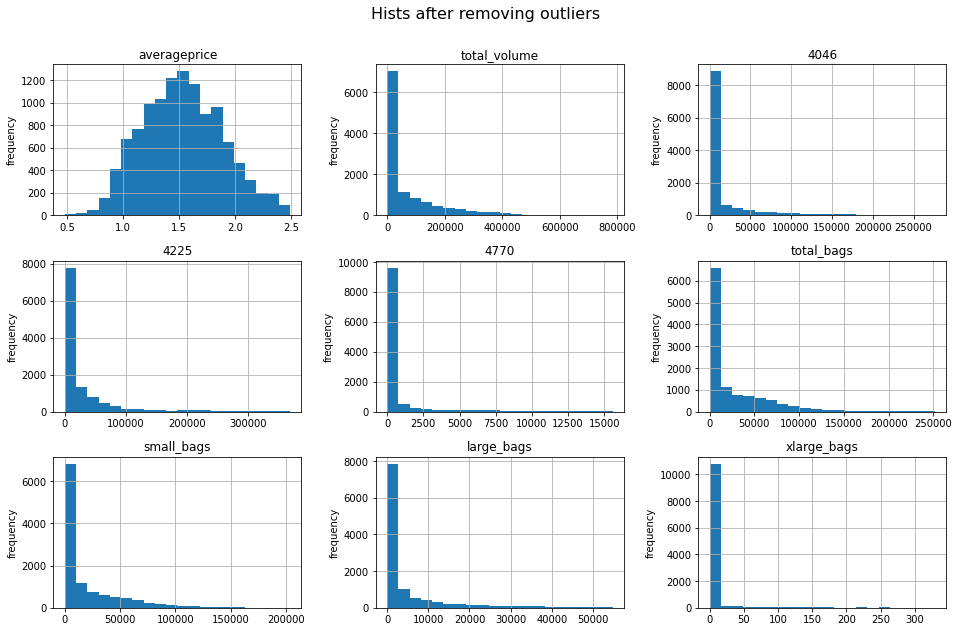

In [82]:
# histograms
param_graphs = df_filtered.hist(numeric_columns, figsize=(16, 10), bins=20)
plt.suptitle("Hists after removing outliers", y=0.96, size=16)
for axis in param_graphs.flatten():
    axis.set_ylabel('frequency')
plt.show()

Distributions  and scatter plot for each variable according to type variable

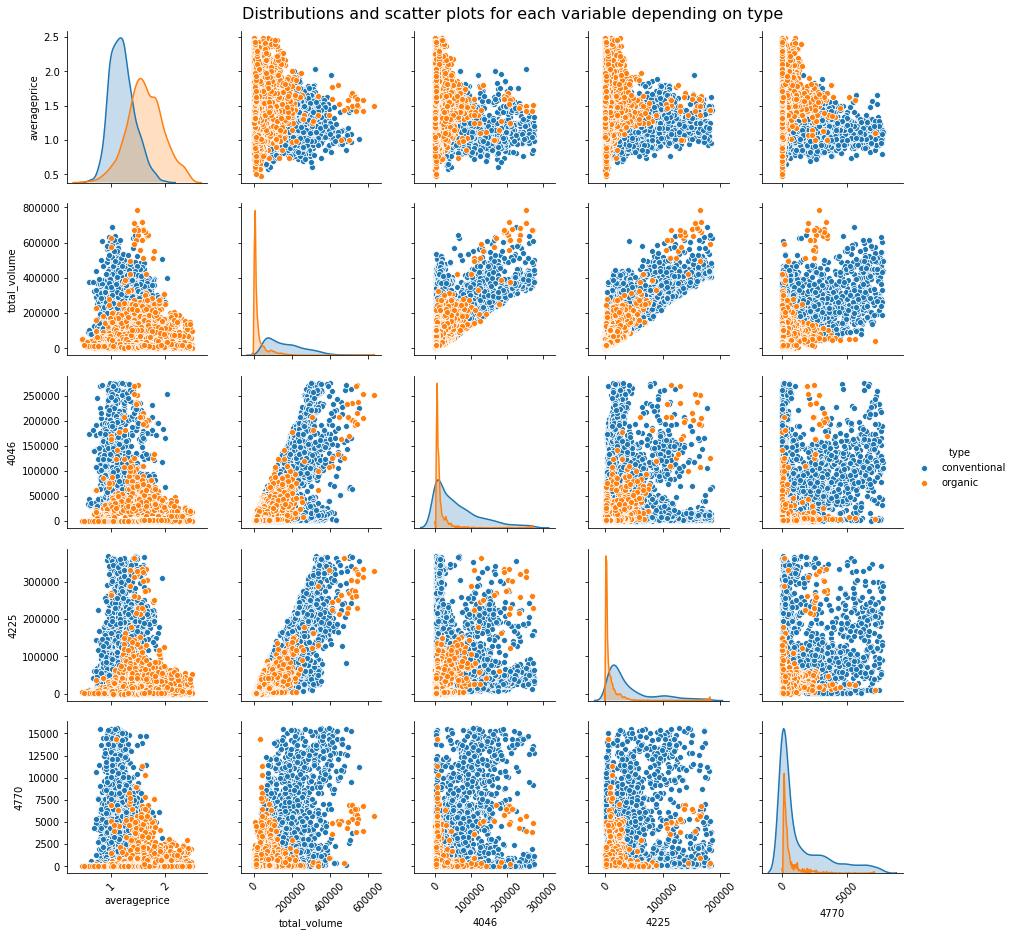

In [83]:
columns_for_research = ['averageprice', 'total_volume', '4046','4225','4770', 'type']
g = sns.pairplot(data=df_filtered[columns_for_research], hue="type")
g.fig.suptitle("Distributions and scatter plots for each variable depending on type", y=1.01, size=16)
for ax in g.axes.flat: 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

><div style="font-size:16px">2.2.2 Categorical columns</div>
Barplots

In [85]:
ten_largest_volume_regions = df_filtered.groupby(['region'])['total_volume'].sum().sort_values(ascending=False).reset_index().head(10)
fig = px.bar(ten_largest_volume_regions,x='region', y='total_volume', title='Top ten regions with the greatest total volume over the time')
fig.show()

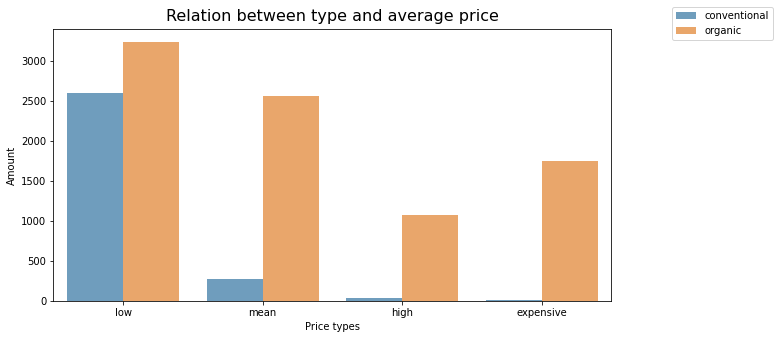

In [15]:
df_count_type = df_filtered.groupby(['price_types', 'type'])['date'].count().reset_index()

plt.figure(figsize=(10, 5))
sns.countplot(x='price_types', alpha=0.7, hue='type', 
                  data=df_filtered)
plt.legend( bbox_to_anchor=(1.1, 1.1), loc='upper left')
plt.xlabel('Price types'), plt.ylabel('Amount')
plt.title('Relation between type and average price', size=16, y=1.01);

><div style="background-color: #FBFFEE;">
><div style="font-weight: bold;font-size:20px">Observations:</div>
><ul style="font-size:18px;">
 From the lineplots above:
><li>At the daily and monthly average price we see  a decline in price in January 2016-2017 y. We can conclude that in winter avocados are not in demand, or there were a too much avocados in shops; </li>
><li>At the average price per year chart we see a steady decline from 2015 to 2016 y. </li>
><li>  After that there is an increase, the peak is in 2017 year.</li>
></ul>
></div>

<a id="sub-33"></a>
><div style="font-weight: bold;font-size:20px">2.3 The Correlation matrix</div>
><div style="font-size:16px"> Correlation matrix depicts the correlation coefficients between all pairs of features in the data.
>
> We use the Pearson correlation coefficient, which is a measure of the linear association between two variables. It has a value between -1 and 1 where:
>
><li>-1 indicates a perfectly negative linear correlation between two variables</li>
><li>0 indicates no linear correlation between two variables</li>
><li>1 indicates a perfectly positive linear correlation between two variables</li></div>

In [114]:
matrix = np.triu(corr)
matrix.shape

(10, 10)

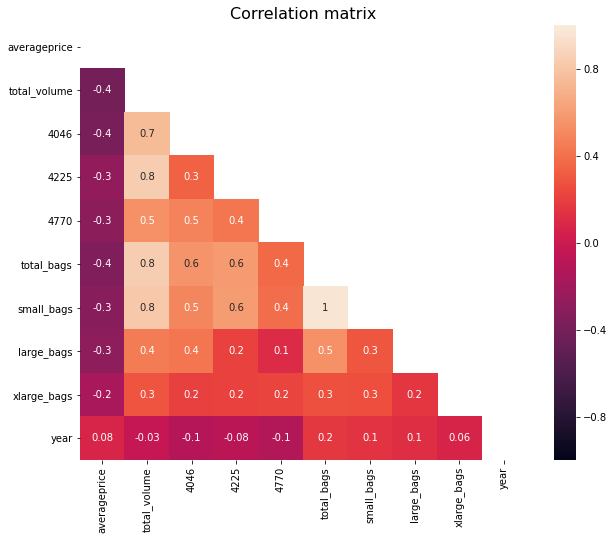

In [96]:
# calculating the correlation matrix
corr = df_filtered.corr()
matrix = np.triu(corr)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmax=1.0, vmin=-1.0, 
            fmt='.1g', annot=True,mask = matrix)

plt.title('Correlation matrix', size=16)
plt.show()

><div style="background-color: #FBFFEE;">
><div style="font-weight: bold;font-size:20px">BIG observations about all the above:</div>
><ul style="font-size:18px;">
><li>At the daily and monthly average price we see  a decline in price in January 2016-2017 y. We can conclude that in winter avocados are not in demand, or there were a too much avocados in shops; </li>
><li>At the average price per year chart we see a steady decline from 2015 to 2016 y. </li>
><li>  After that there is an increase, the peak is in 2017 year.</li>
></ul>
></div>

<a id="section-end"></a>
<div style="font-weight: bold;font-size:40px">The overall conclusion</div>

><div style="background-color: #FBFFEE;">
><ul style="font-size:20px;">


></ul>
></div>

<a id="section-end"></a>
<div style="font-size:40px" align=center>Work in Progress
<img src="https://i.pinimg.com/564x/9a/42/79/9a4279006e123929b83ad139c42c5da6.jpg" width=50>

</div>

><div style="background-color: #FBFFEE;">
><ul style="font-size:20px;">
 <b>Thank you</b> so much for reading my project. 
 <br>Please, UPvote, if you like it or find it usefull!🍀

></ul>
></div>